In [1]:
import numpy as np

In [6]:
def remove_i(x, i):
    shape = (x.shape[0]-1,) + x.shape[1:]
    y = np.empty(shape, dtype=float)
    y[:i] = x[:i]
    y[i:] = x[i+1:]
    return y

def a(i, x, G, m):
    'the accerleration of the ith mass'
    x_i = x[i]
    x_j = remove_i(x, i)
    m_j = remove_i(m, i)
    diff = x_j - x_i
    mag3 = np.sum(diff**2, axis=1)**1.5
    result = G * np.sum(diff * (m_j / mag3)[:,np.newaxis], axis=0)
    return result

def timestep(x0, v0, G, m, dt):
    N = len(x0)
    x1 = np.empty(x0.shape, dtype=float)
    v1 = np.empty(v0.shape, dtype=float)
    for i in range(N):
        a_i0 = a(i, x0, G, m)
        v1[i] = a_i0 * dt + v0[i]
        x1[i] = a_i0 * dt ** 2 + v0[i] * dt + x0[i]
    return x1, v1

def initial_cond(N, D):
    x0 = np.random.rand(N, D)
    v0 = np.zeros((N,D), dtype=float)
    m = np.ones(N, dtype=float)
    return x0, v0, m
        

In [9]:
x0, v0, m = initial_cond(10,2)
x1, v1 = timestep(x0, v0, 1, m, 1e-3)
#print(x1, v1)

In [10]:
def simulate(N, D, S, G, dt):
    x0, v0, m = initial_cond(N, D)
    for s in range(S):
        x1, v1 = timestep(x0, v0, G, m, dt)
        x0, v0 = x1, v1

In [13]:
import time
Ns = [2**i for i in range(14)]
Ns

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

In [30]:
runtimes = []
for N in Ns:
    start = time.time()
    simulate(N, 3, 5, 1, 1e-3)
    stop = time.time()
    runtimes.append(stop - start)

Text(0, 0.5, 'Relative time, s')

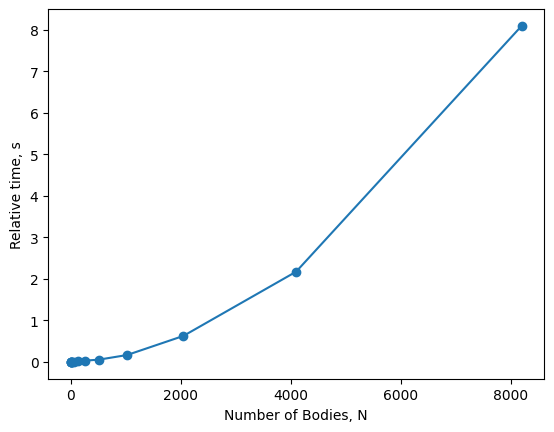

In [31]:
import matplotlib.pyplot as plt
plt.plot(Ns, runtimes, marker='o')
plt.xlabel('Number of Bodies, N')
plt.ylabel('Relative time, s')

In [32]:
runtimes

[0.0005512237548828125,
 0.000308990478515625,
 0.0005381107330322266,
 0.0010178089141845703,
 0.002907991409301758,
 0.004886150360107422,
 0.010465145111083984,
 0.014618873596191406,
 0.030735015869140625,
 0.05511188507080078,
 0.1661520004272461,
 0.6260111331939697,
 2.1724460124969482,
 8.08801794052124]

In [33]:
t2n = []
for i in range(len(runtimes)-1):
    t2 = runtimes[i+1] / runtimes[i]
    t2n.append(t2)

Text(0, 0.5, 'Relative time, tn/tn2')

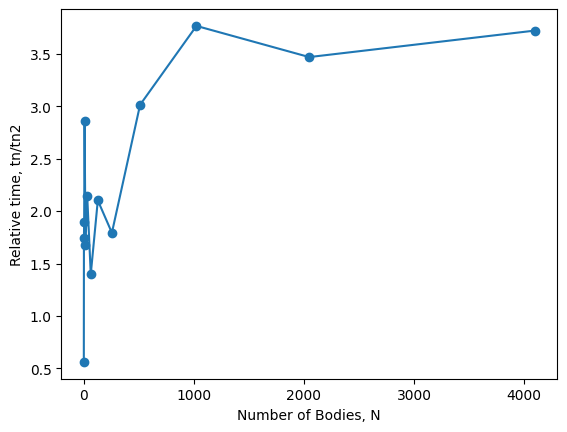

In [34]:
plt.plot(Ns[:-1], t2n, marker='o')
plt.xlabel('Number of Bodies, N')
plt.ylabel('Relative time, tn/tn2')